## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

LOADING THE DATASET

In [3]:
df = pd.read_csv(r"C:\Users\manis\OneDrive\Desktop\SalaryPrediction\data\Salary_Dataset_with_Extra_Features.csv")
df.head()


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


SHAPE OF THE DATASET

In [1]:
df.shape

(22770, 8)

COLUMNS PRESENT IN THE DATASET

In [4]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

CHECKING INFORMATION ABOUT DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


DESCRIPTIVE STATISTICS

In [6]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
df["Company Name"] = df["Company Name"].fillna("Unknown")


CHECKING IF THERE IS ANY NULL VALUE PRESENT IN THE DATASET

In [8]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

CHECKING IF THERE ARE ANY DUPLICATE ROWS PRESENT IN THE DATASET 

In [9]:
df.duplicated().sum()

np.int64(0)

CHECKING THE NUMBER OF UNIQUE VALUES OF DIFFERENT FEATURES

In [10]:
df["Rating"].nunique()

41

In [11]:
df["Company Name"].nunique()

11261

In [12]:
df["Job Title"].nunique()

1080

In [13]:
df["Salaries Reported"].nunique()

82

In [14]:
df["Location"].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

CHECKING MEAN, MEDIAN, MAX AND MIN SALARY

In [15]:
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695387
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


HANDLING CATEGORICAL DATA

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Employment Status'] = le.fit_transform(df['Employment Status'])
df['Job Roles'] = le.fit_transform(df['Job Roles'])
df['Location'] = le.fit_transform(df['Location'])
df['Company Name'] = le.fit_transform(df['Company Name'])
df['Job Title'] = le.fit_transform(df['Job Title'])

HANDLING IMBALANCE DATA 

In [ ]:
for i in df.columns:
  df[[i]].boxplot()
  plt.show()

LOWEST 5 SALARIES PRESENT IN THE DATASET

In [18]:
df["Salary"].sort_values()[:5]

22563     2112
9937      8448
18429    12000
10316    12000
2472     12000
Name: Salary, dtype: int64

HIGHEST 5 SALARIES PRESENT IN THE DATASET

In [19]:
df["Salary"].sort_values(ascending = False)[:5]

18635    90000000
9260     10000000
4471     10000000
7121     10000000
5819      9900000
Name: Salary, dtype: int64

In [20]:
df["Location"].value_counts()

Location
0    8264
2    4467
8    4176
1    2458
9    2134
7     749
5     178
6     155
4     108
3      81
Name: count, dtype: int64

BARPLOT FOR COUNT OF LOCATION (UNIVARIATE ANALYSIS)

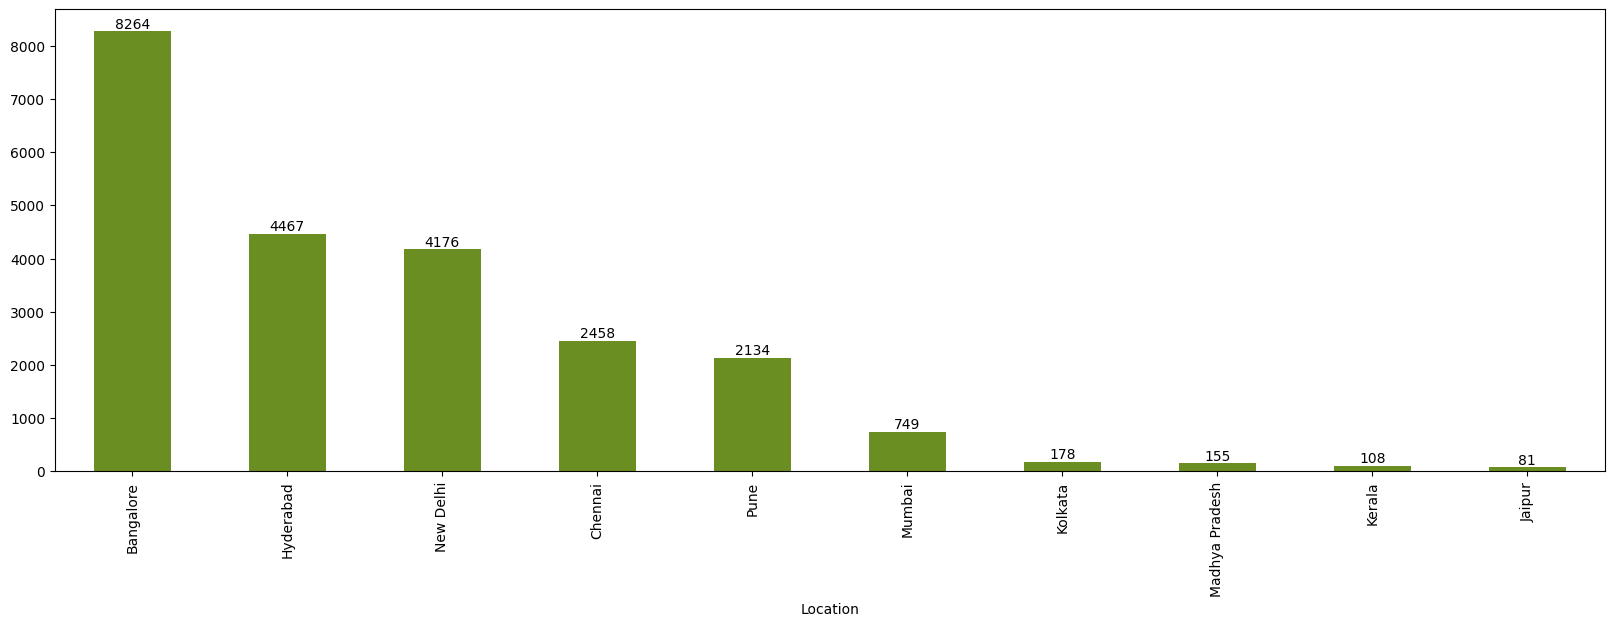

In [7]:
plt.figure(figsize = (20, 6))
ax = df.Location.value_counts().plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

BARPLOT FOR LOCATION VS SALARIES REPORTED (BIVARIATE ANALYSIS)

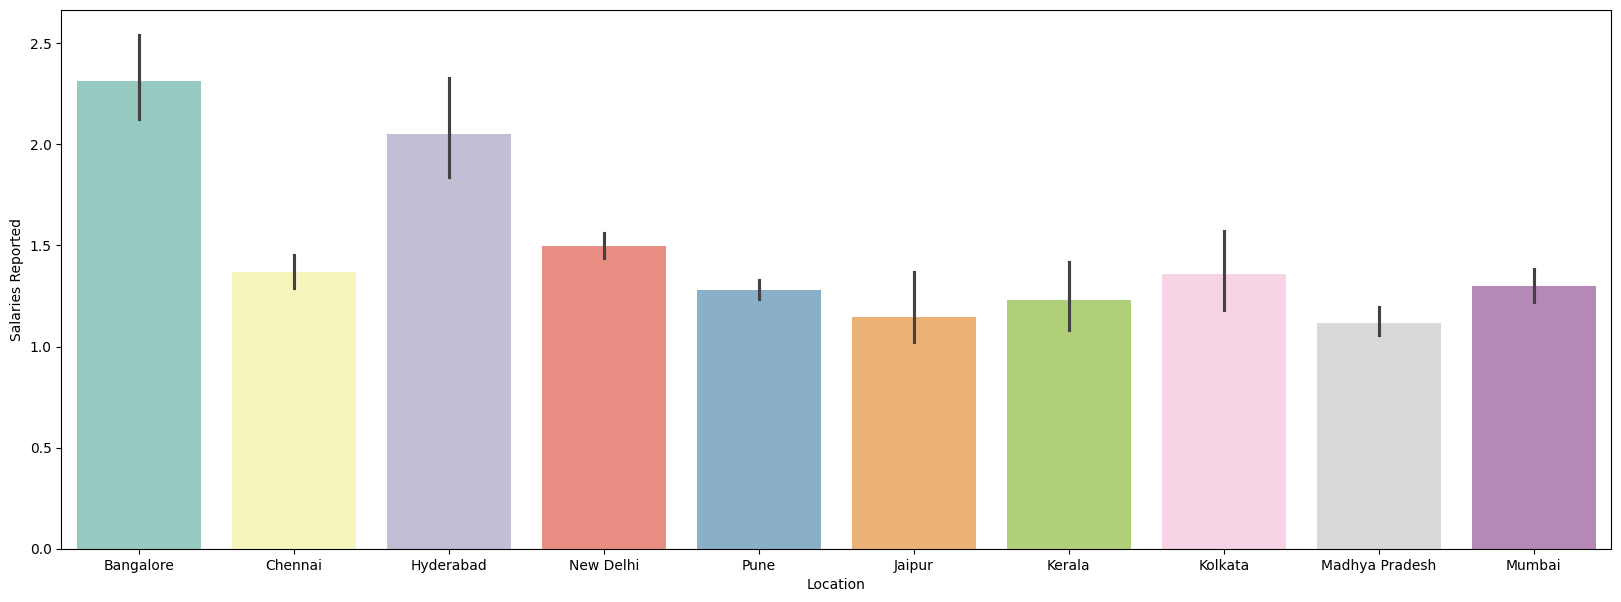

In [3]:
plt.figure(figsize = (20, 7))
sns.barplot(x = df["Location"], y = df["Salaries Reported"], palette = "Set3");

BARPLOT FOR SALARY VS LOCATION

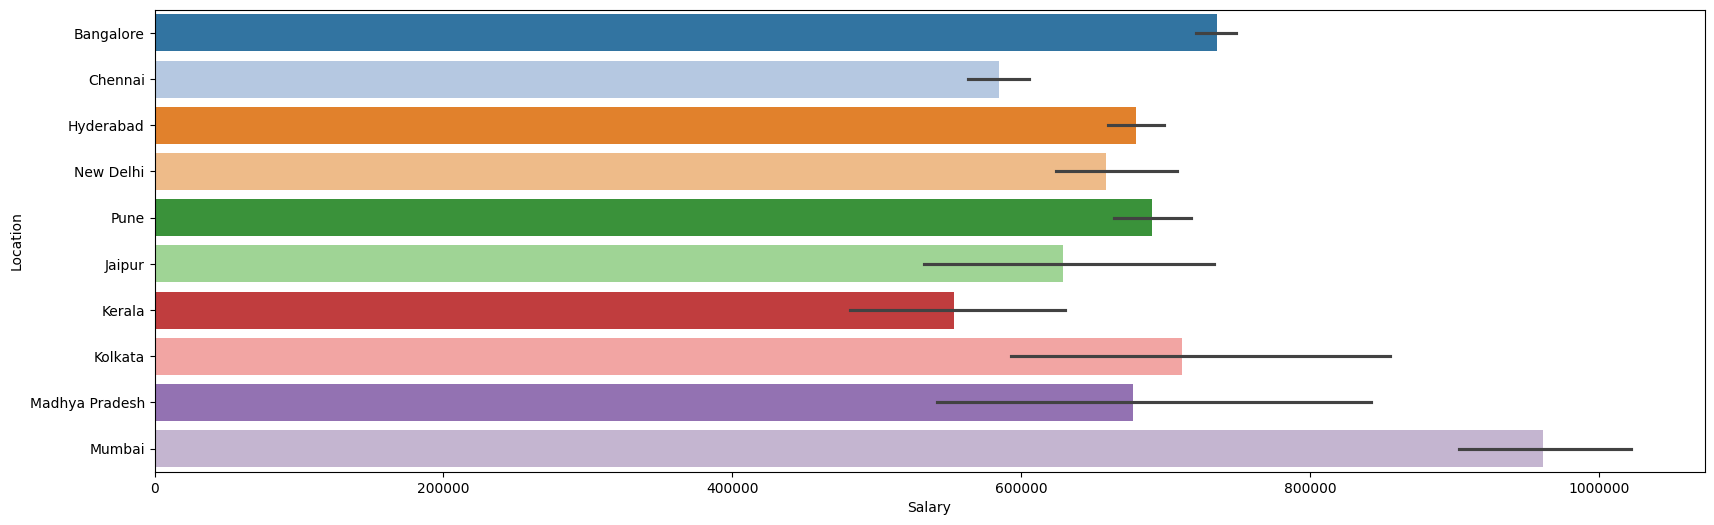

In [5]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salary"], y = df["Location"], palette = "tab20");

BARPLOT FOR COMPANY VS SALARY

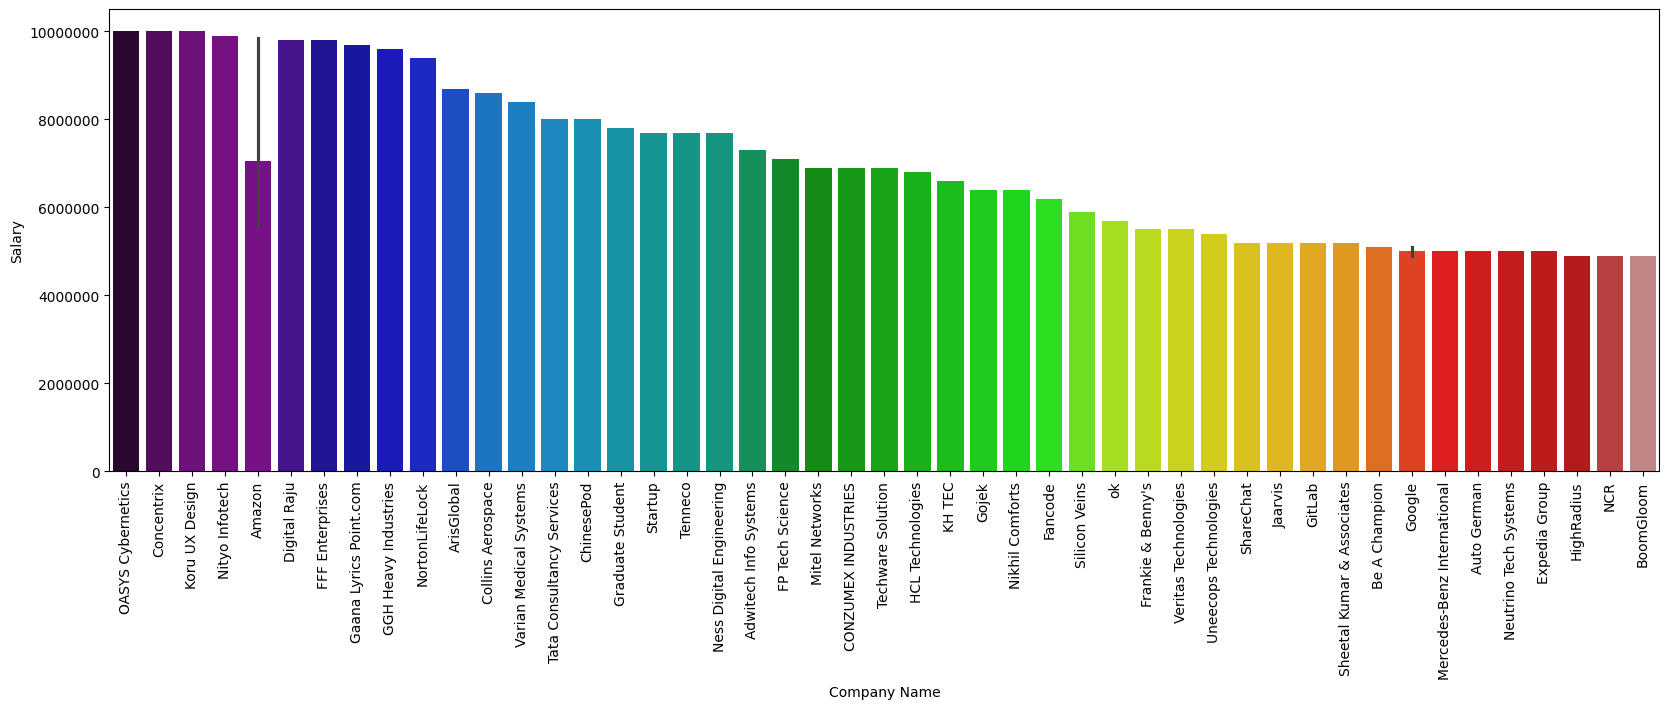

In [6]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],
            y = df["Salary"][1:51],
            palette = "nipy_spectral");

In [25]:
df["Job Title"].value_counts()

Job Title
829     2351
28      2029
831     1614
205     1412
1040    1314
        ... 
97         1
489        1
3          1
937        1
830        1
Name: count, Length: 1080, dtype: int64

BARPLOT FOR COUNT OF DIFFERENT JOB TITLES

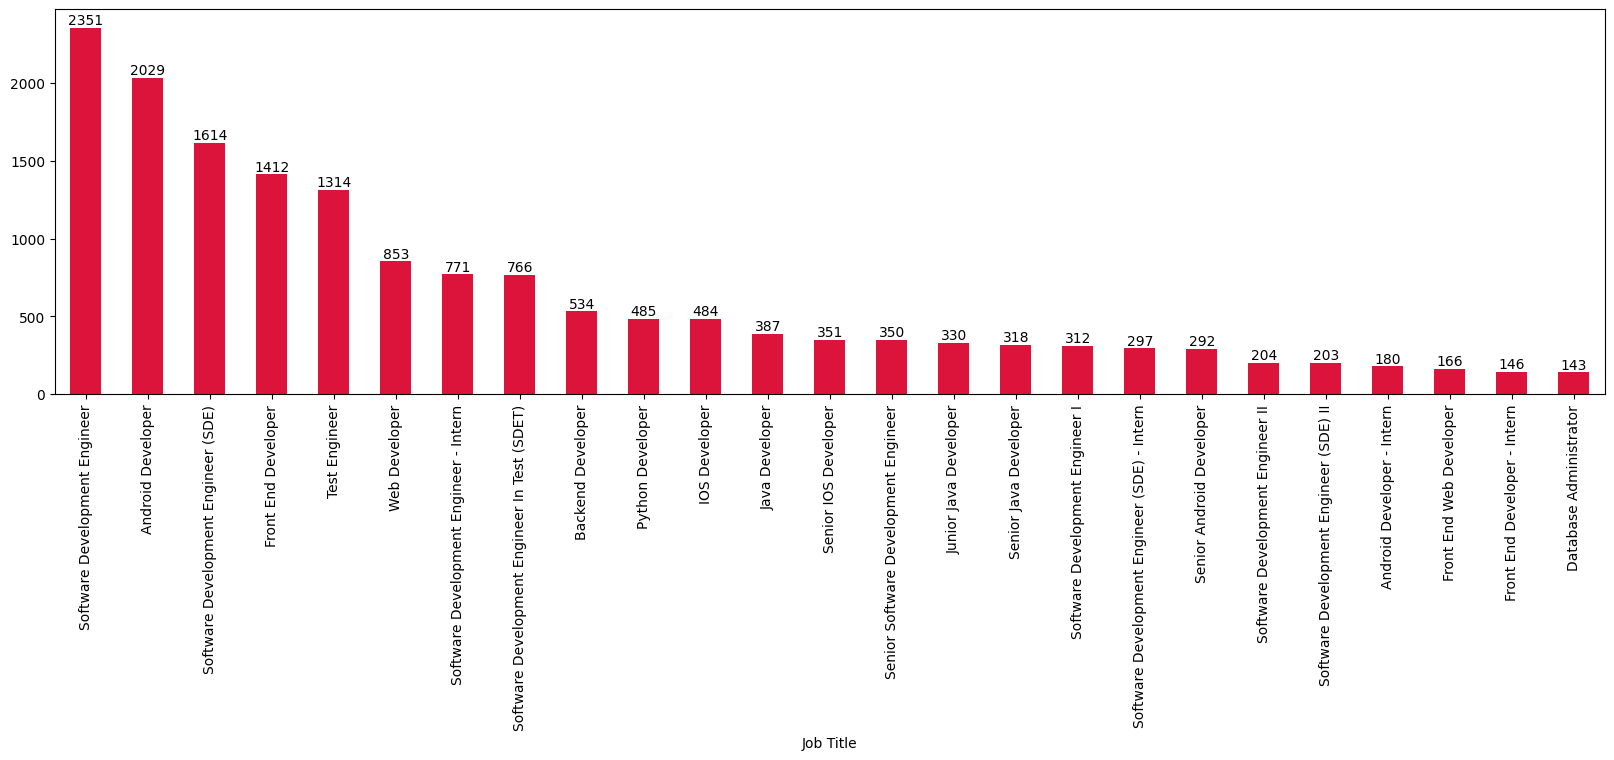

In [14]:
plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar',
                                              color = "crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

PIECHART FOR TOP 20 JOB TITLES (PERCENTAGES)

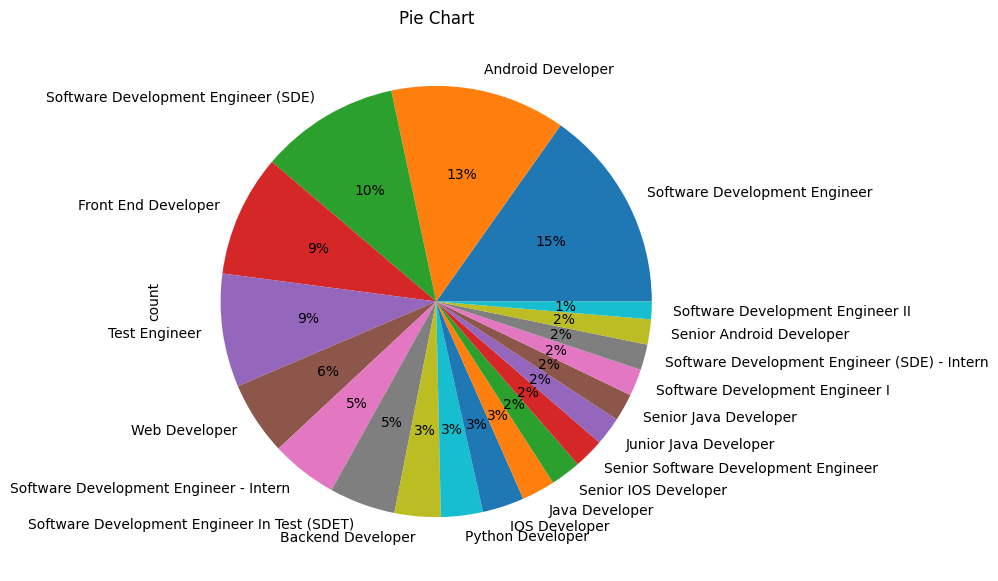

In [7]:
df["Job Title"].value_counts()[:20].plot.pie(figsize = (7, 7),
                                             autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

In [28]:
df["Company Name"].value_counts()

Company Name
9160    271
660     184
4486    169
313     150
2094    144
       ... 
9611      1
4719      1
2132      1
6519      1
3565      1
Name: count, Length: 11261, dtype: int64

BARPLOT FOR SALARY VS JOB TITLE

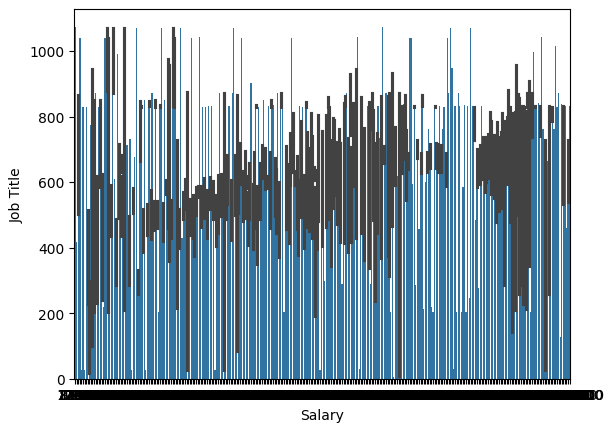

In [29]:
sns.barplot(x='Salary', y='Job Title',data=df)
plt.show()

BARPLOT FOR JOB TITLE VS TOP 100 HIGHEST SALARIES

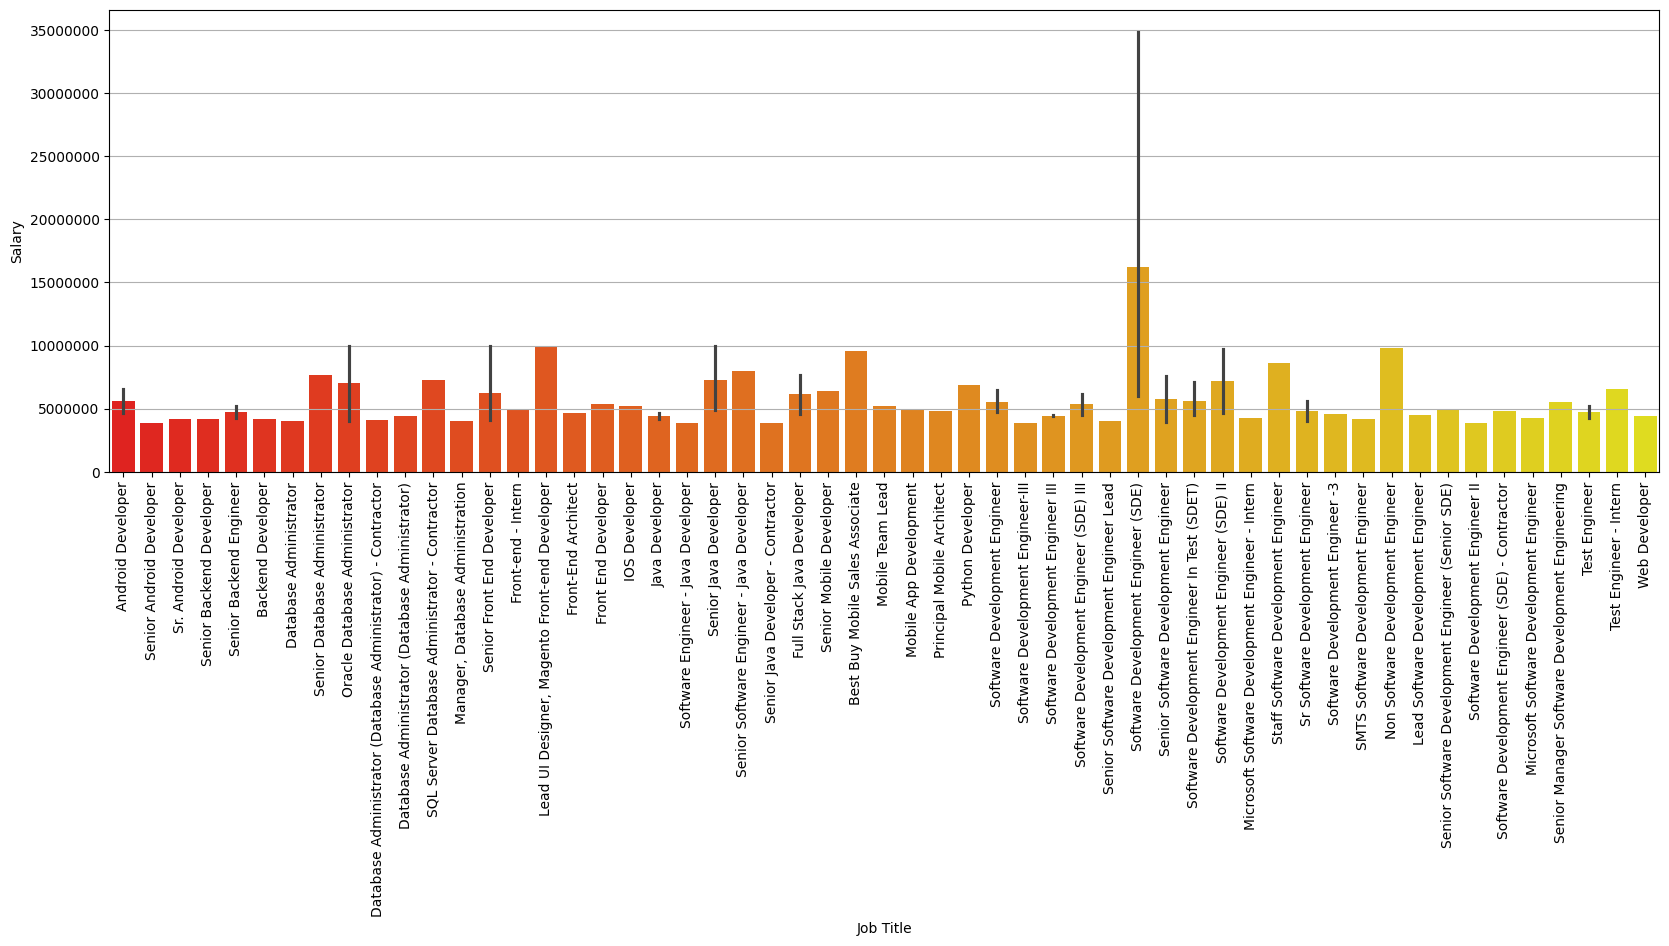

In [8]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0,
                         ascending = False,
                         inplace = True)
sns.barplot(x = df["Job Title"][:100],
            y = df["Salary"],
            palette = "autumn");

BARPLOT FOR JOB TITLE VS TOP 100 LOWEST SALARIES

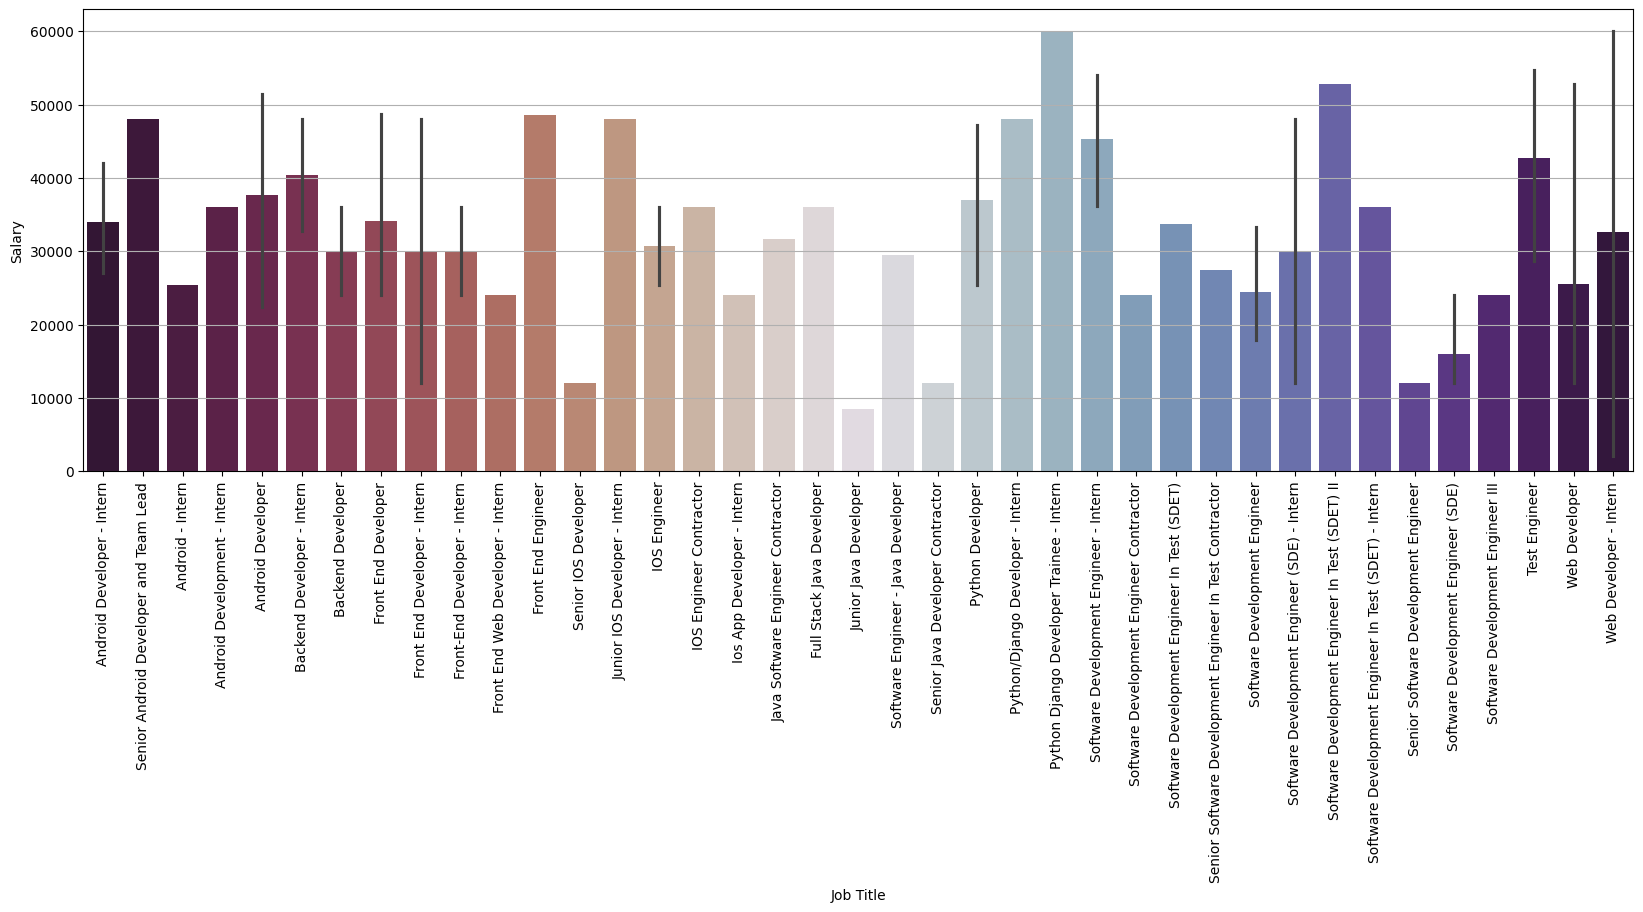

In [9]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = df["Job Title"][:100], y = df["Salary"], palette = "twilight_shifted_r");

HISTOGRAM FOR COMPANY RATINGS

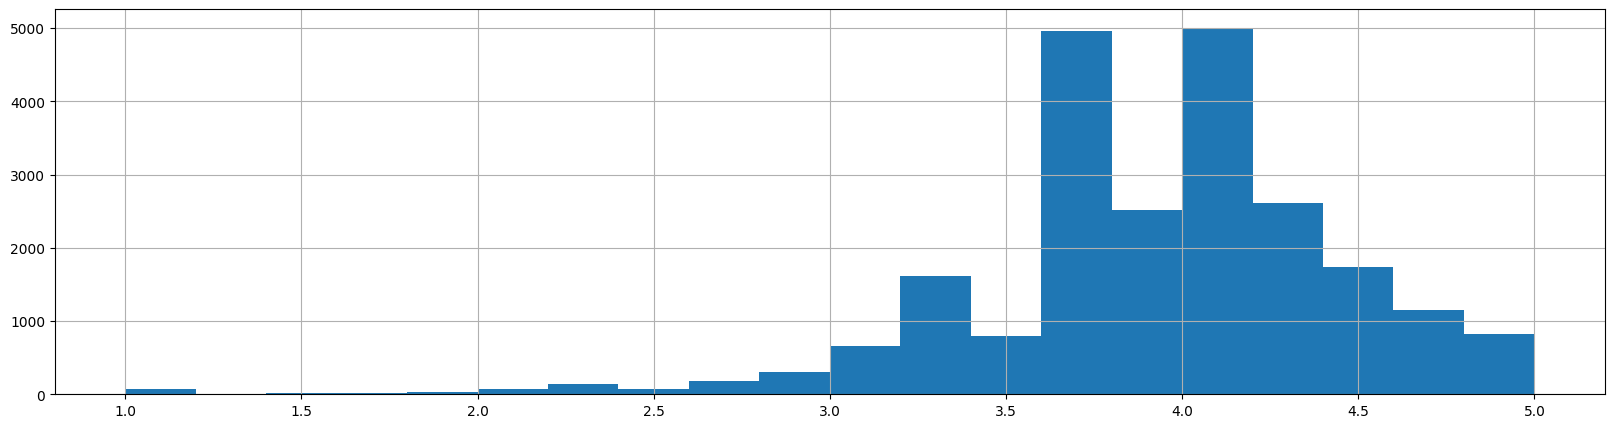

In [10]:
n_bins = 20
plt.figure(figsize = (20, 5))
df["Rating"].hist(bins = n_bins);

SCATTERPLOT ON RATING VS SALARIES REPORTED VS LOCATION (MULTIVARIATE ANALYSIS)

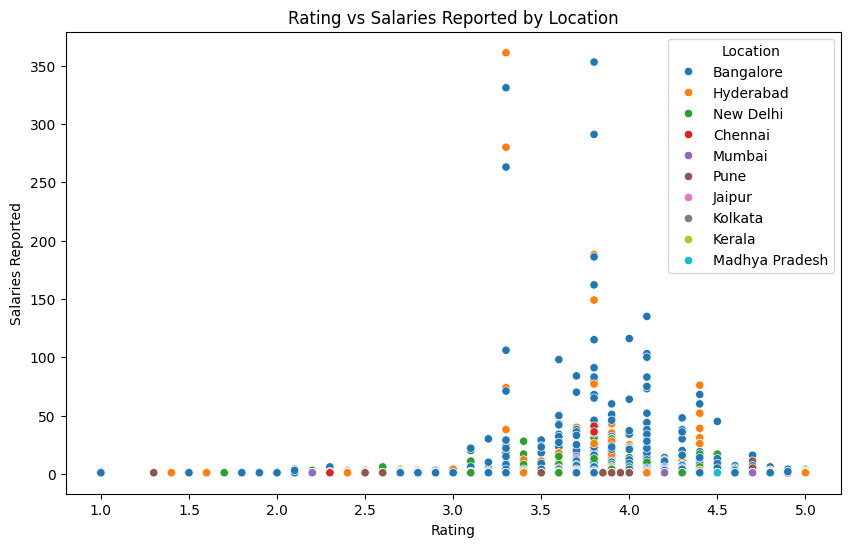

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Rating", y="Salaries Reported", hue="Location", palette="tab10")

plt.title("Rating vs Salaries Reported by Location")
plt.show()


In [35]:
df["Employment Status"].value_counts()

Employment Status
1    20083
2     2106
0      548
3       33
Name: count, dtype: int64

BARPLOT FOR EMPLOYMENT STATUS VS SALARY

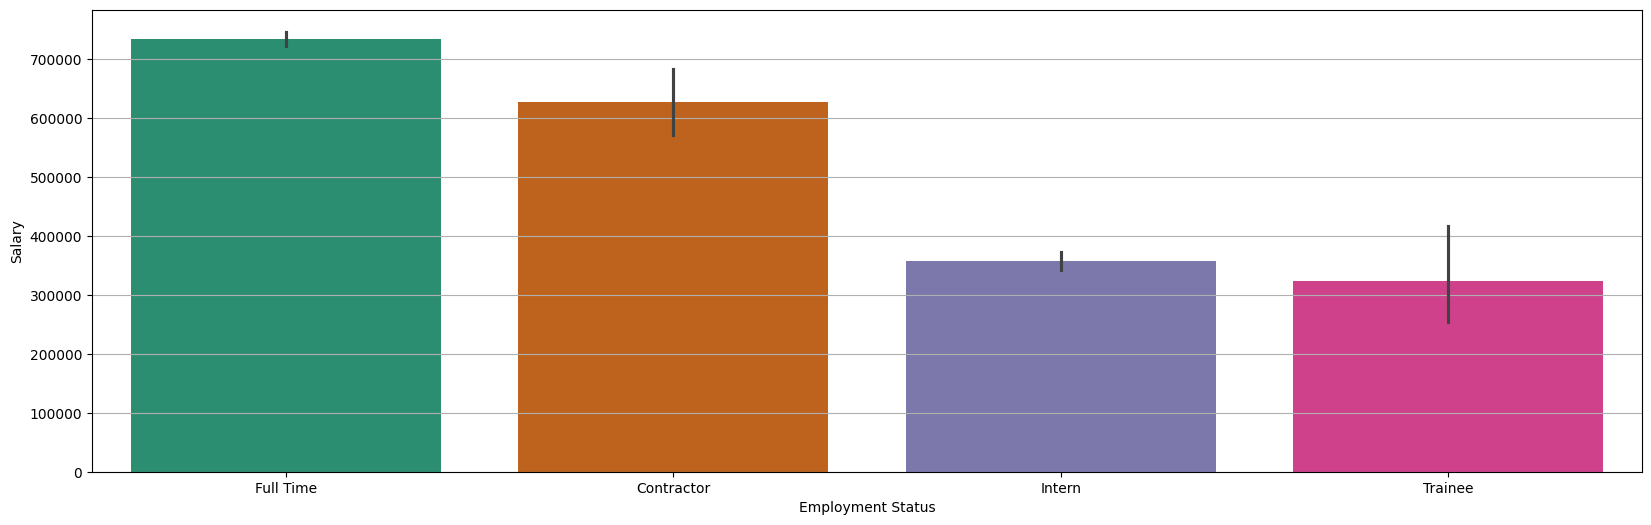

In [6]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Employment Status"], y = df["Salary"], palette = "Dark2");


In [79]:
df["Job Roles"].value_counts()

Job Roles
8     8183
0     2945
3     2163
5     1858
9     1740
4     1631
1     1194
10     999
7      947
2      865
6      245
Name: count, dtype: int64

BARPLOT ON JOB ROLES

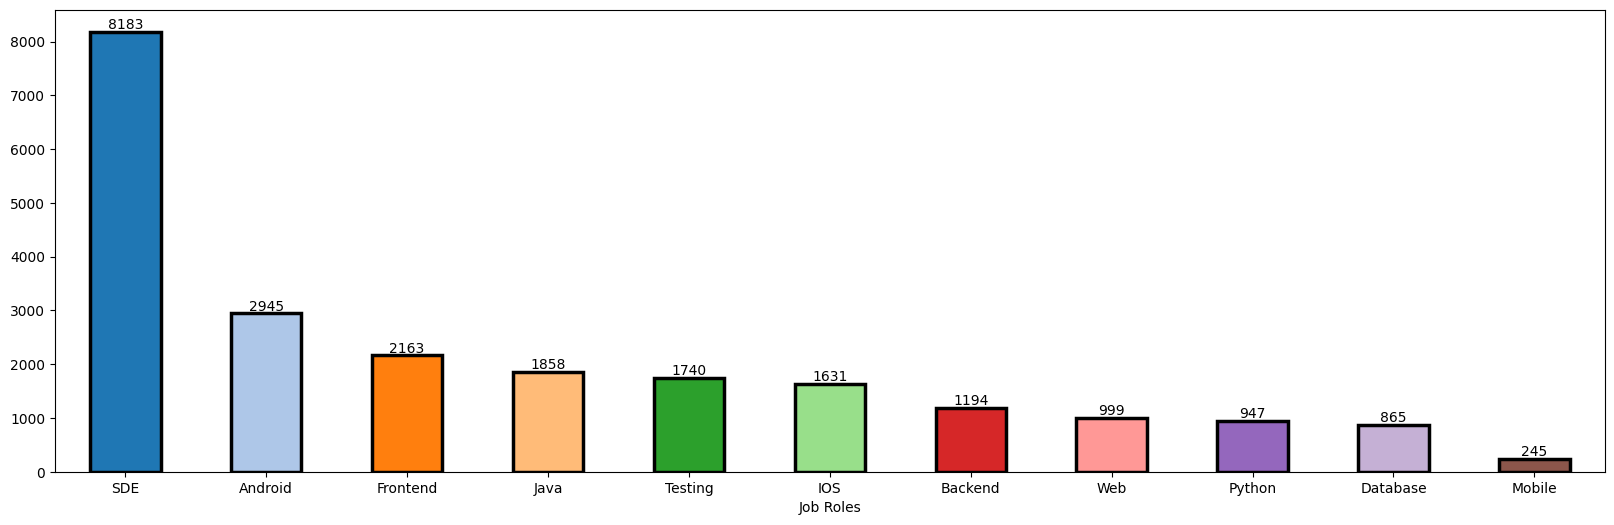

In [7]:
plt.figure(figsize = (20, 6))
col_map = plt.get_cmap('tab20')
ax = df["Job Roles"].value_counts().plot(kind = 'bar',
                                             color = col_map.colors,
                                             rot = 0, edgecolor = 'Black',
                                             linewidth = 2.5)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

BARPLOT FOR JOB ROLES VS SALARY

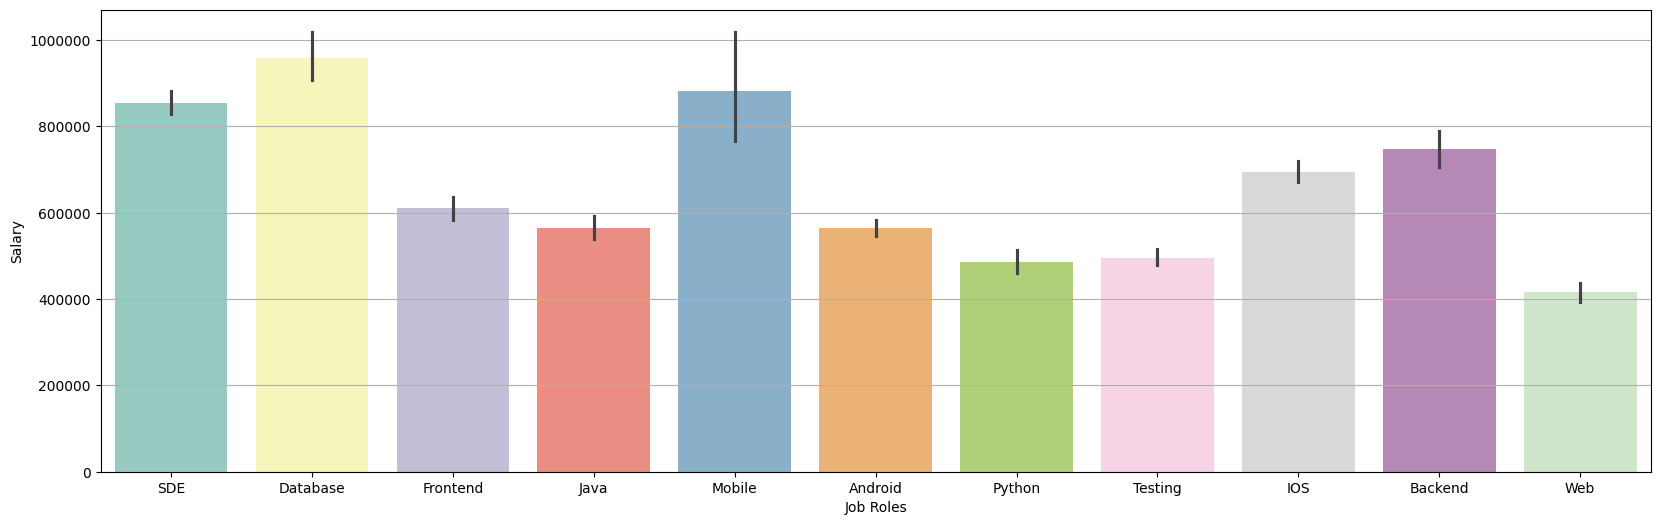

In [8]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Job Roles"], y = df["Salary"], palette = "Set3");

PIECHART ON JOB ROLES

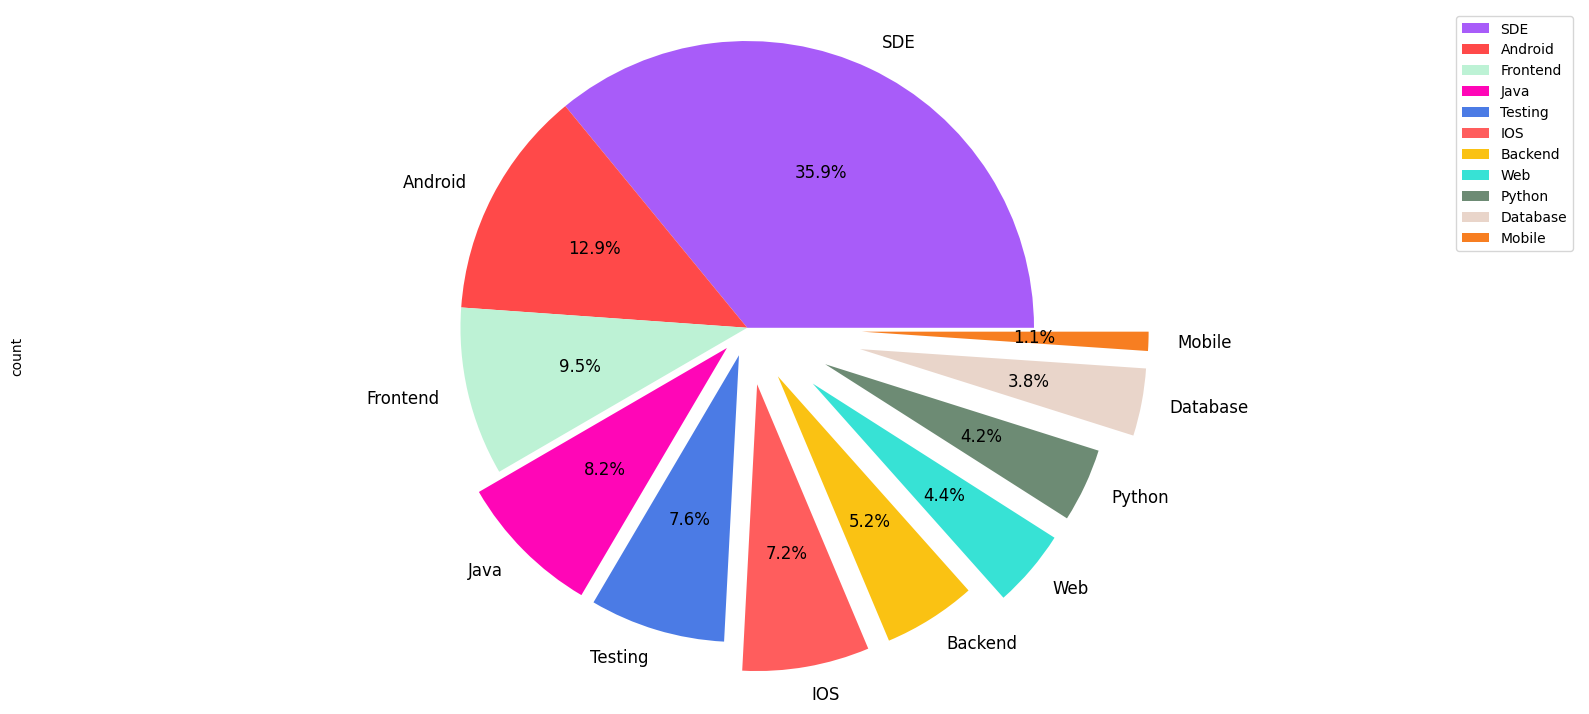

In [9]:
plt.figure(figsize = (20, 9))

counts = df["Job Roles"].value_counts()
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4)
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA', '#F77E21']

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

SPLITTING DATA INTO TRAIN AND TEST 

In [83]:
x = df.drop(['Salary'],axis = 1)
y = df['Salary']

In [84]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [85]:
len(X_train), len(X_test)

(18216, 4554)

In [86]:
len(y_train), len(y_test)

(18216, 4554)

TRAINING THE MODEL IN MULTIPLE ALGORITHMS

DECISION TREE 

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

In [88]:
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

In [89]:
y_train_pred[:5]

array([ 400000.,  588000.,  300000.,  540000., 1700000.])

In [90]:
y_test_pred[:5]

array([1300000.,  420000.,  900000.,  400000.,  300000.])

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [92]:
r2_score(y_train, y_train_pred)*100

99.83158841336262

In [93]:
mean_squared_error(y_train, y_train_pred)

1485087665.6606646

In [94]:
r2_score(y_test, y_test_pred)*100

-62.61400454736443

In [95]:
mean_squared_error(y_test, y_test_pred)

623167409109.7456

RANDOM FOREST

In [96]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [97]:
r2_score(y_train, y_train_pred)*100

86.59980838473122

In [98]:
mean_squared_error(y_train, y_train_pred)

118165618427.28189

In [99]:
r2_score(y_test, y_test_pred)*100

12.59350787398823

In [100]:
mean_squared_error(y_test, y_test_pred)

334958095332.2691

XG BOOST

In [101]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

In [102]:
r2_score(y_train, y_train_pred)*100

73.83542060852051

In [103]:
mean_squared_error(y_train, y_train_pred)

230724616192.0

In [104]:
r2_score(y_test, y_test_pred)*100

15.029734373092651

In [105]:
mean_squared_error(y_test, y_test_pred)

325622005760.0

LINEAR REGRESSION

In [106]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [107]:
r2_score(y_train, y_train_pred)*100

1.8362672309302885

In [108]:
mean_squared_error(y_train, y_train_pred)

865627785245.2856

In [109]:
r2_score(y_test, y_test_pred)*100

4.118277837531159

In [110]:
mean_squared_error(y_test, y_test_pred)

367436768728.9981

TESTING THE MODEL (RANDOM FOREST)

In [111]:
rfr.predict([[0.7,6422,461,1,0,1,3]])

array([5812240.])

In [112]:
rfr.predict([[2.5,5116,709,1,9,1,3]])

array([4269880.])

In [113]:
rfr.predict([[1.2,4718,1071,1,0,1,5]])

array([981640.])

In [114]:
rfr.predict([[1.2,3412,8942,1,7,1,2]])

array([982040.])

In [115]:
rfr.predict([[1.8,2342,2218,1021,1,5,2]])

array([562756.48])

SAVING THE BEST MODEL

In [116]:
with open("Software Industry Salary Prediction.pkl", "wb") as f:
    pickle.dump(rfr,f)